In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import xgboost as xgb
import pickle

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
data = pd.read_csv ('ot.csv',sep=',',dtype= np.float64)

In [4]:
data.dropna(inplace=True)

In [5]:
data=np.array(data)
print(data.shape)

(3719, 122)


In [6]:
X = data[:, 1:121]
Y = data[:, 121]

In [7]:
xtrain, xtest, trainY, testY = model_selection.train_test_split(X, Y, test_size = 0.3)

In [8]:
#Scaling of data
SS = preprocessing.StandardScaler()
xtrain = SS.fit_transform(xtrain)
xtest = SS.transform (xtest)

In [9]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)
print(xtrain.shape)
print(xtest.shape)

(2603, 120, 1)
(1116, 120, 1)


In [3]:
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [11]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(120, 1)))
model.add(Flatten())
model.add(Dense(200, input_dim=120, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
    
model.compile(loss="mse", optimizer="adam",metrics = ['mae', 'mse', r2_keras] )
 
model.fit(xtrain, trainY, batch_size=50,epochs=100, verbose=1)

Epoch 1/100
2603/2603 [==============================] - 1s 472us/step - loss: 919.1409 - mean_absolute_error: 23.6930 - mean_squared_error: 919.1409 - r2_keras: -0.2986
Epoch 2/100
2603/2603 [==============================] - 1s 227us/step - loss: 385.6236 - mean_absolute_error: 15.8910 - mean_squared_error: 385.6236 - r2_keras: 0.4433
Epoch 3/100
2603/2603 [==============================] - 1s 237us/step - loss: 300.7867 - mean_absolute_error: 13.5677 - mean_squared_error: 300.7867 - r2_keras: 0.5626
Epoch 4/100
2603/2603 [==============================] - 1s 278us/step - loss: 241.4356 - mean_absolute_error: 12.0584 - mean_squared_error: 241.4356 - r2_keras: 0.6540
Epoch 5/100
2603/2603 [==============================] - 1s 225us/step - loss: 196.1066 - mean_absolute_error: 10.8888 - mean_squared_error: 196.1066 - r2_keras: 0.7143
Epoch 6/100
2603/2603 [==============================] - 1s 221us/step - loss: 172.6613 - mean_absolute_error: 10.0353 - mean_squared_error: 172.6613 - r2

2603/2603 [==============================] - 1s 199us/step - loss: 4.9131 - mean_absolute_error: 1.6563 - mean_squared_error: 4.9131 - r2_keras: 0.9929
Epoch 98/100
2603/2603 [==============================] - 1s 213us/step - loss: 4.7842 - mean_absolute_error: 1.6361 - mean_squared_error: 4.7842 - r2_keras: 0.9931
Epoch 99/100
2603/2603 [==============================] - 1s 193us/step - loss: 4.5551 - mean_absolute_error: 1.6030 - mean_squared_error: 4.5551 - r2_keras: 0.9934
Epoch 100/100
2603/2603 [==============================] - 1s 201us/step - loss: 3.7657 - mean_absolute_error: 1.4706 - mean_squared_error: 3.7657 - r2_keras: 0.9939


In [12]:
test_loss = model.evaluate(xtest, testY)
print(test_loss)
print(np.sqrt(test_loss))

1116/1116 [==============================] - 0s 136us/step
[33.17734386416746, 3.976387456326502, 33.17734386416746, 0.952196004142898]
[5.75997777 1.99408813 5.75997777 0.97580531]


In [13]:
ypred = model.predict(xtest)

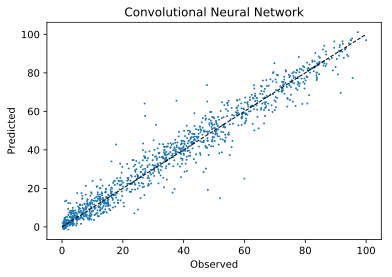

In [16]:
fig, ax = plt.subplots()
ax.scatter(testY, ypred, s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Convolutional Neural Network')
plt.savefig("1_CNN.jpg", format="jpg")
plt.show()

In [66]:
data = pd.read_csv ('ot.csv',sep=',',dtype= np.float64)

In [67]:
data.dropna(inplace=True)

In [68]:
data=np.array(data)
print(data.shape)

(3719, 122)


In [69]:
X = data[:, 1:121]
Y = data[:, 121]

X = np.array(X)
Y = np.array(Y)

In [70]:
xtrain, xtest, trainY, testY = model_selection.train_test_split(X, Y, test_size = 0.3)

In [71]:
#Scaling of data
SS = preprocessing.StandardScaler()
xtrain = SS.fit_transform(xtrain)
xtest = SS.transform (xtest)

In [23]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': [1000], 'max_features': ['auto'], 'criterion': ['mae']}
RF = model_selection.GridSearchCV(ensemble.RandomForestRegressor(),parameter, cv=5, n_jobs=-1)
RF.fit(xtrain, trainY)
    
RFtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, RF.predict(xtest)))
RFtest_r2  = metrics.r2_score(testY, RF.predict(xtest))
RFtest_mae  = metrics.mean_absolute_error(testY, RF.predict(xtest))
    
RMSE.append(RFtest_rmse)  
R2.append(RFtest_r2)
MAE.append(RFtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(RF.best_params_)

RMSE:  8.538251645270229 R2:  0.89854636509714 MAE:  5.519572907706101
{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 1000}


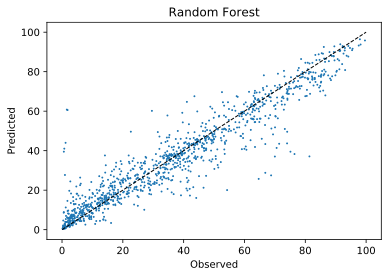

In [24]:
fig, ax = plt.subplots()
ax.scatter(testY, RF.predict(xtest), s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Random Forest')
plt.savefig("2_RandomForest.jpg", format="jpg")
plt.show()

In [17]:
#with open('RF.pickle', "wb") as f:
 #   pickle.dump(RF, f)

In [25]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': [1000], 'loss': ['ls'], 'learning_rate':[0.01], 'criterion': ['friedman_mse'], 
             'min_samples_split': [3], 'max_depth': [10], 'max_features': ['sqrt']}
GB = model_selection.GridSearchCV(ensemble.GradientBoostingRegressor(),parameter, cv=5, n_jobs=-1)
GB.fit(xtrain, trainY)
    
GBtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, GB.predict(xtest)))
GBtest_r2  = metrics.r2_score(testY, GB.predict(xtest))
GBtest_mae  = metrics.mean_absolute_error(testY, GB.predict(xtest))
    
RMSE.append(GBtest_rmse)  
R2.append(GBtest_r2)
MAE.append(GBtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(GB.best_params_)

RMSE:  7.704286708310873 R2:  0.9173972353061386 MAE:  4.935999410916867
{'max_features': 'sqrt', 'learning_rate': 0.01, 'max_depth': 10, 'loss': 'ls', 'criterion': 'friedman_mse', 'min_samples_split': 3, 'n_estimators': 1000}


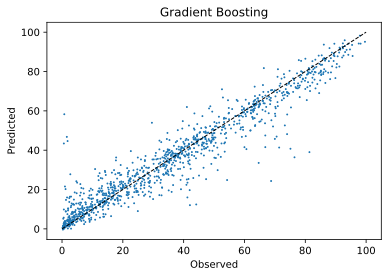

In [26]:
fig, ax = plt.subplots()
ax.scatter(testY, GB.predict(xtest), s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Gradient Boosting')
plt.savefig("3_GradientBoosting.jpg", format="jpg")
plt.show()

In [20]:
#with open('GB.pickle', "wb") as f:
 #   pickle.dump(GB, f)

In [27]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': [1000], 'loss': ['square'], 'learning_rate':[1.0]}
AB = model_selection.GridSearchCV(ensemble.AdaBoostRegressor(),parameter, cv=5, n_jobs=-1)
AB.fit(xtrain, trainY)
    
ABtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, AB.predict(xtest)))
ABtest_r2  = metrics.r2_score(testY, AB.predict(xtest))
ABtest_mae  = metrics.mean_absolute_error(testY, AB.predict(xtest))
    
RMSE.append(ABtest_rmse)  
R2.append(ABtest_r2)
MAE.append(ABtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(AB.best_params_)

RMSE:  15.453217654068924 R2:  0.6676715256669837 MAE:  13.140798466626523
{'n_estimators': 1000, 'learning_rate': 1.0, 'loss': 'square'}


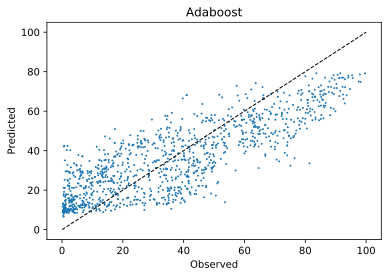

In [28]:
fig, ax = plt.subplots()
ax.scatter(testY, AB.predict(xtest), s =1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Adaboost')
plt.savefig("4_Adaboost.jpg", format="jpg")
plt.show()

In [10]:
#with open('AB.pickle', "wb") as f:
 #   pickle.dump(AB, f)

In [29]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': [1000], 'max_samples': [1500], 'max_features': [50]}
BG = model_selection.GridSearchCV(ensemble.BaggingRegressor(),parameter, cv=5, n_jobs=-1)
BG.fit(xtrain, trainY)
    
BGtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, BG.predict(xtest)))
BGtest_r2  = metrics.r2_score(testY, BG.predict(xtest))
BGtest_mae  = metrics.mean_absolute_error(testY, BG.predict(xtest))
    
RMSE.append(BGtest_rmse)  
R2.append(BGtest_r2)
MAE.append(BGtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(BG.best_params_)

RMSE:  9.33937987039509 R2:  0.8786147851841591 MAE:  6.109254416752011
{'max_features': 50, 'max_samples': 1500, 'n_estimators': 1000}


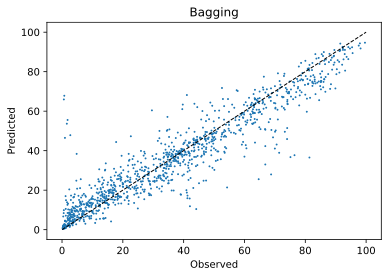

In [30]:
fig, ax = plt.subplots()
ax.scatter(testY, BG.predict(xtest), s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Bagging')
plt.savefig("5_Bagging.jpg", format="jpg")
plt.show()

In [13]:
#with open('BG.pickle', "wb") as f:
 #   pickle.dump(BG, f)

In [72]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_neighbors':[5, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto'], 'metric': ['minkowski']}
KNN = model_selection.GridSearchCV(neighbors.KNeighborsRegressor(),parameter, cv=5, n_jobs=-1)
KNN.fit(xtrain, trainY)
    
KNNtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, KNN.predict(xtest)))
KNNtest_r2  = metrics.r2_score(testY, KNN.predict(xtest))
KNNtest_mae  = metrics.mean_absolute_error(testY, KNN.predict(xtest))
    
RMSE.append(KNNtest_rmse)  
R2.append(KNNtest_r2)
MAE.append(KNNtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(KNN.best_params_)

RMSE:  16.84586089713409 R2:  0.607150163196236 MAE:  13.060105734767026
{'metric': 'minkowski', 'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}


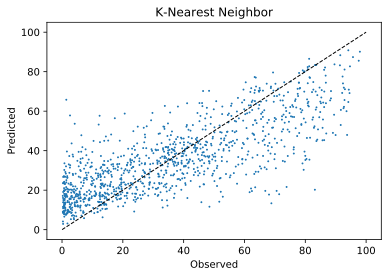

In [73]:
fig, ax = plt.subplots()
ax.scatter(testY, KNN.predict(xtest), s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('K-Nearest Neighbor')
plt.savefig("9_KNN.jpg", format="jpg")
plt.show()

In [31]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'kernel': ["rbf", "linear", "poly", "sigmoid"], 'C': [0.1, 1, 10, 100]}
SVM = model_selection.GridSearchCV(svm.SVR(),parameter, cv=5, n_jobs=-1)
SVM.fit(xtrain, trainY)
    
SVMtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, SVM.predict(xtest)))
SVMtest_r2  = metrics.r2_score(testY, SVM.predict(xtest))
SVMtest_mae  = metrics.mean_absolute_error(testY, SVM.predict(xtest))
    
RMSE.append(SVMtest_rmse)  
R2.append(SVMtest_r2)
MAE.append(SVMtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(SVM.best_params_)

RMSE:  11.357546836318978 R2:  0.8204858101063567 MAE:  7.775942694145464
{'C': 100, 'kernel': 'rbf'}


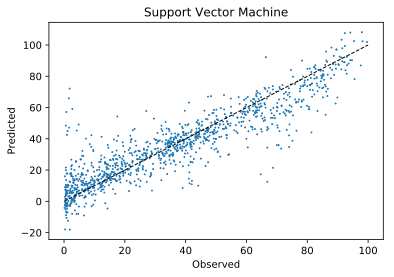

In [32]:
fig, ax = plt.subplots()
ax.scatter(testY, SVM.predict(xtest), s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Support Vector Machine')
plt.savefig("5_Support Vector Machine.jpg", format="jpg")
plt.show()

In [33]:
from sklearn.gaussian_process.kernels import RBF

In [34]:
RMSE = []
R2 = []
MAE = []

kernel = 1.0 * RBF(1.0)
parameter = {'alpha': [0.1, 0.01, 1], 'n_restarts_optimizer': [0], 'kernel': [kernel]}
GPR = model_selection.GridSearchCV(gaussian_process.GaussianProcessRegressor(),parameter, cv=5, n_jobs=-1)
GPR.fit(xtrain, trainY)
    
GPRtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, GPR.predict(xtest)))
GPRtest_r2  = metrics.r2_score(testY, GPR.predict(xtest))
GPRtest_mae  = metrics.mean_absolute_error(testY, GPR.predict(xtest))
    
RMSE.append(GPRtest_rmse)  
R2.append(GPRtest_r2)
MAE.append(GPRtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(GPR.best_params_)

C:\Users\PETINRIN Olutomilayo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE:  10.322359258723626 R2:  0.8517182677151748 MAE:  7.166350475634464
{'n_restarts_optimizer': 0, 'alpha': 0.1, 'kernel': 1**2 * RBF(length_scale=1)}


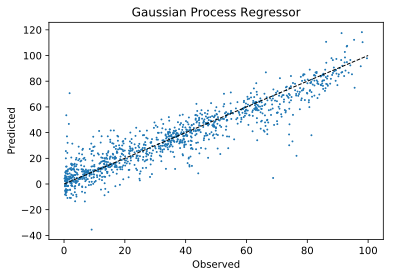

In [35]:
fig, ax = plt.subplots()
ax.scatter(testY, GPR.predict(xtest), s = 1)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=1, markersize=0.1)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Gaussian Process Regressor')
plt.savefig("7_GPR.jpg", format="jpg")
plt.show()

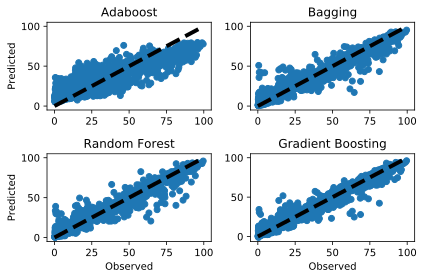

In [35]:
#plt.figure(1, figsize = 30,16)
#plt.subplot(221)
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(testY, AB.predict(xtest))
ax[0,0].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
#ax[0,0].set_xlabel('Observed')
ax[0,0].set_ylabel('Predicted')
ax[0,0].set_title('Adaboost')

#plt.subplot(222)
#fig, ax = plt.subplots()
ax[0,1].scatter(testY, BG.predict(xtest))
ax[0,1].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4,)
#ax[0,1].set_xlabel('Observed')
#ax[0,1].set_ylabel('Predicted')
ax[0,1].set_title('Bagging')

#plt.subplot(223)
#fig, ax = plt.subplots()
ax[1,0].scatter(testY, RF.predict(xtest))
ax[1,0].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4,)
ax[1,0].set_xlabel('Observed')
ax[1,0].set_ylabel('Predicted')
ax[1,0].set_title('Random Forest')

#plt.subplot(224)
#fig, ax = plt.subplots()
ax[1,1].scatter(testY, GB.predict(xtest))
ax[1,1].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4,)
ax[1,1].set_xlabel('Observed')
#ax[1,1].set_ylabel('Predicted')
ax[1,1].set_title('Gradient Boosting')

fig.tight_layout()
plt.savefig("All.eps", format="eps")
plt.savefig("All.jpg", format="jpg", dpi = 300)    
plt.show()

In [36]:
data = pd.read_csv ('ot.csv',sep=',',dtype= np.float64)
feat_labels=data.columns.values.tolist()[1:-1]

In [37]:
clf = ensemble.RandomForestRegressor(n_estimators=1000, max_features = 'auto', criterion = 'mae', n_jobs=-1)
clf.fit(xtrain, trainY)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

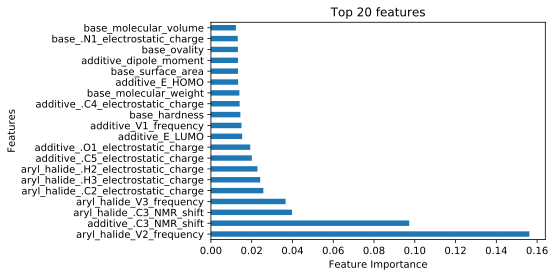

In [38]:
feat_importances = pd.Series(clf.feature_importances_, index=feat_labels)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 features')
plt.savefig('8_20 top FS.jpg', format ='jpg', dpi =300, bbox_inches="tight")
plt.show()

In [4]:
addata = pd.read_csv ('outadd.csv',sep=',',dtype= np.float64)

In [5]:
addata.dropna(inplace=True)

In [6]:
addata=np.array(addata)
print(addata.shape)

(3719, 103)


In [7]:
adX = addata[:, 1:102]
adY = addata[:, 102]

In [8]:
adxtrain, adxtest, adtrainY, adtestY = model_selection.train_test_split(adX, adY, test_size = 0.3)

In [9]:
#Scaling of data
SS = preprocessing.StandardScaler()
adxtrain = SS.fit_transform(adxtrain)
adxtest = SS.transform (adxtest)

In [10]:
adxtrain = adxtrain.reshape(adxtrain.shape[0], adxtrain.shape[1], 1)
adxtest = adxtest.reshape(adxtest.shape[0], adxtest.shape[1], 1)
print(adxtrain.shape)
print(adxtest.shape)

(2603, 101, 1)
(1116, 101, 1)


In [11]:
admodel = Sequential()
admodel.add(Conv1D(32, 2, activation="relu", input_shape=(101, 1)))
admodel.add(Flatten())
admodel.add(Dense(200, input_dim=101, kernel_initializer='normal', activation='relu'))
admodel.add(Dense(150, kernel_initializer='normal', activation='relu'))
admodel.add(Dense(100, kernel_initializer='normal', activation='relu'))
admodel.add(Dense(1, kernel_initializer='normal'))
    
admodel.compile(loss="mse", optimizer="adam",metrics = ['mae', 'mse', r2_keras] )
 
admodel.fit(adxtrain, adtrainY, batch_size=50,epochs=100, verbose=1)

Epoch 1/100
2603/2603 [==============================] - 1s 439us/step - loss: 886.3201 - mean_absolute_error: 23.4625 - mean_squared_error: 886.3201 - r2_keras: -0.2559
Epoch 2/100
2603/2603 [==============================] - 0s 173us/step - loss: 416.2678 - mean_absolute_error: 16.7289 - mean_squared_error: 416.2678 - r2_keras: 0.3990
Epoch 3/100
2603/2603 [==============================] - 0s 167us/step - loss: 370.2066 - mean_absolute_error: 15.4096 - mean_squared_error: 370.2066 - r2_keras: 0.4621
Epoch 4/100
2603/2603 [==============================] - 0s 167us/step - loss: 346.7341 - mean_absolute_error: 14.7753 - mean_squared_error: 346.7341 - r2_keras: 0.4958
Epoch 5/100
2603/2603 [==============================] - 0s 170us/step - loss: 325.0957 - mean_absolute_error: 14.1477 - mean_squared_error: 325.0957 - r2_keras: 0.5336
Epoch 6/100
2603/2603 [==============================] - 0s 168us/step - loss: 308.6468 - mean_absolute_error: 13.5917 - mean_squared_error: 308.6468 - r2

2603/2603 [==============================] - 1s 199us/step - loss: 260.8030 - mean_absolute_error: 12.0950 - mean_squared_error: 260.8030 - r2_keras: 0.6171
Epoch 50/100
2603/2603 [==============================] - 0s 177us/step - loss: 262.3279 - mean_absolute_error: 12.1764 - mean_squared_error: 262.3279 - r2_keras: 0.6148
Epoch 51/100
2603/2603 [==============================] - 0s 177us/step - loss: 258.8995 - mean_absolute_error: 12.0882 - mean_squared_error: 258.8995 - r2_keras: 0.6297
Epoch 52/100
2603/2603 [==============================] - 0s 178us/step - loss: 266.0753 - mean_absolute_error: 12.3037 - mean_squared_error: 266.0753 - r2_keras: 0.6118
Epoch 53/100
2603/2603 [==============================] - 0s 170us/step - loss: 256.3182 - mean_absolute_error: 12.0748 - mean_squared_error: 256.3182 - r2_keras: 0.6303
Epoch 54/100
2603/2603 [==============================] - 0s 169us/step - loss: 258.5432 - mean_absolute_error: 12.0829 - mean_squared_error: 258.5432 - r2_keras: 

2603/2603 [==============================] - 0s 175us/step - loss: 255.4967 - mean_absolute_error: 11.9422 - mean_squared_error: 255.4967 - r2_keras: 0.6302
Epoch 98/100
2603/2603 [==============================] - 0s 181us/step - loss: 256.6047 - mean_absolute_error: 12.0207 - mean_squared_error: 256.6047 - r2_keras: 0.6270
Epoch 99/100
2603/2603 [==============================] - 0s 183us/step - loss: 253.6979 - mean_absolute_error: 11.8937 - mean_squared_error: 253.6979 - r2_keras: 0.6318
Epoch 100/100
2603/2603 [==============================] - 0s 186us/step - loss: 254.5362 - mean_absolute_error: 11.9766 - mean_squared_error: 254.5362 - r2_keras: 0.6240


In [13]:
adtest_loss = admodel.evaluate(adxtest, adtestY)
print(adtest_loss)
print(np.sqrt(adtest_loss))

1116/1116 [==============================] - 0s 139us/step
[290.6222415500217, 12.703353235798497, 290.6222415500217, 0.560816850927141]
[17.04764622  3.56417638 17.04764622  0.74887706]


In [14]:
ardata = pd.read_csv ('outaryl.csv',sep=',',dtype= np.float64)

In [15]:
ardata.dropna(inplace=True)

In [16]:
ardata=np.array(ardata)
print(ardata.shape)

(3719, 95)


In [17]:
arX = ardata[:, 1:94]
arY = ardata[:, 94]

In [18]:
arxtrain, arxtest, artrainY, artestY = model_selection.train_test_split(arX, arY, test_size = 0.3)

In [19]:
#Scaling of data
SS = preprocessing.StandardScaler()
arxtrain = SS.fit_transform(arxtrain)
arxtest = SS.transform (arxtest)

In [20]:
arxtrain = arxtrain.reshape(arxtrain.shape[0], arxtrain.shape[1], 1)
arxtest = arxtest.reshape(arxtest.shape[0], arxtest.shape[1], 1)
print(arxtrain.shape)
print(arxtest.shape)

(2603, 93, 1)
(1116, 93, 1)


In [21]:
armodel = Sequential()
armodel.add(Conv1D(32, 2, activation="relu", input_shape=(93, 1)))
armodel.add(Flatten())
armodel.add(Dense(200, input_dim=93, kernel_initializer='normal', activation='relu'))
armodel.add(Dense(150, kernel_initializer='normal', activation='relu'))
armodel.add(Dense(100, kernel_initializer='normal', activation='relu'))
armodel.add(Dense(1, kernel_initializer='normal'))
    
armodel.compile(loss="mse", optimizer="adam",metrics = ['mae', 'mse', r2_keras] )
 
armodel.fit(arxtrain, artrainY, batch_size=50,epochs=100, verbose=1)

Epoch 1/100
2603/2603 [==============================] - 1s 401us/step - loss: 868.0964 - mean_absolute_error: 23.7412 - mean_squared_error: 868.0964 - r2_keras: -0.2604
Epoch 2/100
2603/2603 [==============================] - 0s 164us/step - loss: 590.0760 - mean_absolute_error: 20.0592 - mean_squared_error: 590.0760 - r2_keras: 0.1439
Epoch 3/100
2603/2603 [==============================] - 0s 157us/step - loss: 556.0470 - mean_absolute_error: 19.2146 - mean_squared_error: 556.0470 - r2_keras: 0.2034
Epoch 4/100
2603/2603 [==============================] - 0s 161us/step - loss: 551.8098 - mean_absolute_error: 19.0276 - mean_squared_error: 551.8098 - r2_keras: 0.2068
Epoch 5/100
2603/2603 [==============================] - 0s 161us/step - loss: 555.3723 - mean_absolute_error: 19.0720 - mean_squared_error: 555.3723 - r2_keras: 0.1934
Epoch 6/100
2603/2603 [==============================] - 0s 160us/step - loss: 541.7364 - mean_absolute_error: 18.7189 - mean_squared_error: 541.7364 - r2

2603/2603 [==============================] - 0s 168us/step - loss: 493.5623 - mean_absolute_error: 17.5932 - mean_squared_error: 493.5623 - r2_keras: 0.2822
Epoch 50/100
2603/2603 [==============================] - 0s 167us/step - loss: 483.3229 - mean_absolute_error: 17.3054 - mean_squared_error: 483.3229 - r2_keras: 0.3018
Epoch 51/100
2603/2603 [==============================] - 0s 161us/step - loss: 488.0581 - mean_absolute_error: 17.4331 - mean_squared_error: 488.0581 - r2_keras: 0.2969
Epoch 52/100
2603/2603 [==============================] - 0s 167us/step - loss: 491.9577 - mean_absolute_error: 17.5245 - mean_squared_error: 491.9577 - r2_keras: 0.2904
Epoch 53/100
2603/2603 [==============================] - 0s 161us/step - loss: 493.3007 - mean_absolute_error: 17.4869 - mean_squared_error: 493.3007 - r2_keras: 0.2811
Epoch 54/100
2603/2603 [==============================] - 0s 160us/step - loss: 494.6796 - mean_absolute_error: 17.5598 - mean_squared_error: 494.6796 - r2_keras: 

2603/2603 [==============================] - 0s 171us/step - loss: 477.3711 - mean_absolute_error: 17.1652 - mean_squared_error: 477.3711 - r2_keras: 0.3071
Epoch 98/100
2603/2603 [==============================] - 0s 175us/step - loss: 477.5677 - mean_absolute_error: 17.2074 - mean_squared_error: 477.5677 - r2_keras: 0.3065
Epoch 99/100
2603/2603 [==============================] - 0s 166us/step - loss: 481.4657 - mean_absolute_error: 17.2755 - mean_squared_error: 481.4657 - r2_keras: 0.2980
Epoch 100/100
2603/2603 [==============================] - 0s 164us/step - loss: 478.2571 - mean_absolute_error: 17.1921 - mean_squared_error: 478.2571 - r2_keras: 0.3089


In [22]:
artest_loss = armodel.evaluate(arxtest, artestY)
print(artest_loss)
print(np.sqrt(artest_loss))

1116/1116 [==============================] - 0s 136us/step
[544.7738481200297, 18.299001338234085, 544.7738481200297, 0.24319369006755104]
[23.34039092  4.2777332  23.34039092  0.49314672]


In [23]:
bdata = pd.read_csv ('outbase.csv',sep=',',dtype= np.float64)

In [24]:
bdata.dropna(inplace=True)

In [25]:
bdata=np.array(bdata)
print(bdata.shape)

(3719, 112)


In [26]:
bX = bdata[:, 1:111]
bY = bdata[:, 111]

In [27]:
bxtrain, bxtest, btrainY, btestY = model_selection.train_test_split(bX, bY, test_size = 0.3)

In [28]:
#Scaling of data
SS = preprocessing.StandardScaler()
bxtrain = SS.fit_transform(bxtrain)
bxtest = SS.transform (bxtest)

In [29]:
bxtrain = bxtrain.reshape(bxtrain.shape[0], bxtrain.shape[1], 1)
bxtest = bxtest.reshape(bxtest.shape[0], bxtest.shape[1], 1)
print(bxtrain.shape)
print(bxtest.shape)

(2603, 110, 1)
(1116, 110, 1)


In [30]:
bmodel = Sequential()
bmodel.add(Conv1D(32, 2, activation="relu", input_shape=(110, 1)))
bmodel.add(Flatten())
bmodel.add(Dense(200, input_dim=110, kernel_initializer='normal', activation='relu'))
bmodel.add(Dense(150, kernel_initializer='normal', activation='relu'))
bmodel.add(Dense(100, kernel_initializer='normal', activation='relu'))
bmodel.add(Dense(1, kernel_initializer='normal'))
    
bmodel.compile(loss="mse", optimizer="adam",metrics = ['mae', 'mse', r2_keras] )
 
bmodel.fit(bxtrain, btrainY, batch_size=50,epochs=100, verbose=1)

Epoch 1/100
2603/2603 [==============================] - 1s 377us/step - loss: 907.5613 - mean_absolute_error: 23.6362 - mean_squared_error: 907.5613 - r2_keras: -0.2754
Epoch 2/100
2603/2603 [==============================] - 1s 197us/step - loss: 415.6184 - mean_absolute_error: 16.5612 - mean_squared_error: 415.6184 - r2_keras: 0.4005
Epoch 3/100
2603/2603 [==============================] - 1s 202us/step - loss: 338.4313 - mean_absolute_error: 14.5023 - mean_squared_error: 338.4313 - r2_keras: 0.5069
Epoch 4/100
2603/2603 [==============================] - 1s 212us/step - loss: 293.4032 - mean_absolute_error: 13.2575 - mean_squared_error: 293.4032 - r2_keras: 0.5756
Epoch 5/100
2603/2603 [==============================] - 1s 210us/step - loss: 255.8545 - mean_absolute_error: 12.1552 - mean_squared_error: 255.8545 - r2_keras: 0.6292
Epoch 6/100
2603/2603 [==============================] - 0s 192us/step - loss: 243.2321 - mean_absolute_error: 11.6788 - mean_squared_error: 243.2321 - r2

2603/2603 [==============================] - 1s 215us/step - loss: 165.2440 - mean_absolute_error: 9.0429 - mean_squared_error: 165.2440 - r2_keras: 0.7611
Epoch 50/100
2603/2603 [==============================] - 0s 189us/step - loss: 159.0346 - mean_absolute_error: 8.7154 - mean_squared_error: 159.0346 - r2_keras: 0.7702
Epoch 51/100
2603/2603 [==============================] - 0s 182us/step - loss: 165.2915 - mean_absolute_error: 9.0064 - mean_squared_error: 165.2915 - r2_keras: 0.7570
Epoch 52/100
2603/2603 [==============================] - 0s 188us/step - loss: 161.8041 - mean_absolute_error: 8.8303 - mean_squared_error: 161.8041 - r2_keras: 0.7647
Epoch 53/100
2603/2603 [==============================] - 0s 183us/step - loss: 161.5041 - mean_absolute_error: 8.8352 - mean_squared_error: 161.5041 - r2_keras: 0.7670
Epoch 54/100
2603/2603 [==============================] - 0s 186us/step - loss: 159.4046 - mean_absolute_error: 8.7330 - mean_squared_error: 159.4046 - r2_keras: 0.7697

2603/2603 [==============================] - 1s 255us/step - loss: 151.5235 - mean_absolute_error: 8.4869 - mean_squared_error: 151.5235 - r2_keras: 0.7837
Epoch 98/100
2603/2603 [==============================] - 1s 227us/step - loss: 147.6329 - mean_absolute_error: 8.3641 - mean_squared_error: 147.6329 - r2_keras: 0.7856
Epoch 99/100
2603/2603 [==============================] - 1s 214us/step - loss: 149.8474 - mean_absolute_error: 8.4124 - mean_squared_error: 149.8474 - r2_keras: 0.7831
Epoch 100/100
2603/2603 [==============================] - 1s 209us/step - loss: 147.5305 - mean_absolute_error: 8.3119 - mean_squared_error: 147.5305 - r2_keras: 0.7868


In [31]:
btest_loss = bmodel.evaluate(bxtest, btestY)
print(btest_loss)
print(np.sqrt(btest_loss))

1116/1116 [==============================] - 0s 170us/step
[226.4946799329532, 10.38543389091355, 226.4946799329532, 0.673645053072215]
[15.04974019  3.22264393 15.04974019  0.82075883]


In [32]:
ldata = pd.read_csv ('outligands.csv',sep=',',dtype= np.float64)

In [33]:
ldata.dropna(inplace=True)

In [34]:
ldata=np.array(ldata)
print(ldata.shape)

(3719, 58)


In [35]:
lX = ldata[:, 1:57]
lY = ldata[:, 57]

In [37]:
lxtrain, lxtest, ltrainY, ltestY = model_selection.train_test_split(lX, lY, test_size = 0.3)

In [38]:
#Scaling of data
SS = preprocessing.StandardScaler()
lxtrain = SS.fit_transform(lxtrain)
lxtest = SS.transform (lxtest)

In [39]:
lxtrain = lxtrain.reshape(lxtrain.shape[0], lxtrain.shape[1], 1)
lxtest = lxtest.reshape(lxtest.shape[0], lxtest.shape[1], 1)
print(lxtrain.shape)
print(lxtest.shape)

(2603, 56, 1)
(1116, 56, 1)


In [40]:
lmodel = Sequential()
lmodel.add(Conv1D(32, 2, activation="relu", input_shape=(56, 1)))
lmodel.add(Flatten())
lmodel.add(Dense(200, input_dim=56, kernel_initializer='normal', activation='relu'))
lmodel.add(Dense(150, kernel_initializer='normal', activation='relu'))
lmodel.add(Dense(100, kernel_initializer='normal', activation='relu'))
lmodel.add(Dense(1, kernel_initializer='normal'))
    
lmodel.compile(loss="mse", optimizer="adam",metrics = ['mae', 'mse', r2_keras] )
 
lmodel.fit(lxtrain, ltrainY, batch_size=50,epochs=100, verbose=1)

Epoch 1/100
2603/2603 [==============================] - 1s 382us/step - loss: 929.3135 - mean_absolute_error: 24.1603 - mean_squared_error: 929.3135 - r2_keras: -0.3293
Epoch 2/100
2603/2603 [==============================] - 0s 136us/step - loss: 410.3245 - mean_absolute_error: 16.4596 - mean_squared_error: 410.3245 - r2_keras: 0.4059
Epoch 3/100
2603/2603 [==============================] - 0s 151us/step - loss: 342.3803 - mean_absolute_error: 14.8538 - mean_squared_error: 342.3803 - r2_keras: 0.5055
Epoch 4/100
2603/2603 [==============================] - 0s 128us/step - loss: 307.4868 - mean_absolute_error: 13.8779 - mean_squared_error: 307.4868 - r2_keras: 0.5624
Epoch 5/100
2603/2603 [==============================] - 0s 126us/step - loss: 275.6653 - mean_absolute_error: 13.0289 - mean_squared_error: 275.6653 - r2_keras: 0.6019
Epoch 6/100
2603/2603 [==============================] - 0s 131us/step - loss: 284.2791 - mean_absolute_error: 13.1143 - mean_squared_error: 284.2791 - r2

2603/2603 [==============================] - 0s 127us/step - loss: 167.8178 - mean_absolute_error: 9.2046 - mean_squared_error: 167.8178 - r2_keras: 0.7578
Epoch 50/100
2603/2603 [==============================] - 0s 118us/step - loss: 174.7950 - mean_absolute_error: 9.5225 - mean_squared_error: 174.7950 - r2_keras: 0.7476
Epoch 51/100
2603/2603 [==============================] - 0s 123us/step - loss: 169.2826 - mean_absolute_error: 9.2324 - mean_squared_error: 169.2826 - r2_keras: 0.7538
Epoch 52/100
2603/2603 [==============================] - 0s 119us/step - loss: 169.8471 - mean_absolute_error: 9.2015 - mean_squared_error: 169.8471 - r2_keras: 0.7530
Epoch 53/100
2603/2603 [==============================] - 0s 122us/step - loss: 169.5473 - mean_absolute_error: 9.2091 - mean_squared_error: 169.5473 - r2_keras: 0.6986
Epoch 54/100
2603/2603 [==============================] - 0s 121us/step - loss: 181.4178 - mean_absolute_error: 9.7046 - mean_squared_error: 181.4178 - r2_keras: 0.7406

2603/2603 [==============================] - 0s 129us/step - loss: 160.2747 - mean_absolute_error: 8.9115 - mean_squared_error: 160.2747 - r2_keras: 0.7704
Epoch 98/100
2603/2603 [==============================] - 0s 139us/step - loss: 158.3199 - mean_absolute_error: 8.8164 - mean_squared_error: 158.3199 - r2_keras: 0.7667
Epoch 99/100
2603/2603 [==============================] - 0s 148us/step - loss: 164.2068 - mean_absolute_error: 9.1103 - mean_squared_error: 164.2068 - r2_keras: 0.7612
Epoch 100/100
2603/2603 [==============================] - 0s 141us/step - loss: 165.7905 - mean_absolute_error: 9.0579 - mean_squared_error: 165.7905 - r2_keras: 0.7627


In [41]:
ltest_loss = lmodel.evaluate(lxtest, ltestY)
print(ltest_loss)
print(np.sqrt(ltest_loss))

1116/1116 [==============================] - 0s 137us/step
[265.09405052704625, 11.12365099862485, 265.09405052704625, 0.5893940684188651]
[16.28170908  3.33521379 16.28170908  0.76772005]
